In [73]:
import pandas as pd
import numpy as np

from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

import seaborn as sns

In [64]:
# Reads in the data and splits it into feature and label arrays
def create_input_tensor(fp):
    df = pd.read_csv(fp)
    features = np.array(df[['x','y']])
    labels = np.array(df['label'])

    return features, labels

In [65]:
X_train, y_train = create_input_tensor('training.csv')
X_test, y_test = create_input_tensor('testing.csv')

In [89]:
# My Model
# I use the KNeighbors classifier because it was better and faster than MLP
kneighbors_model = KNeighborsClassifier(7)
kneighbors_model.fit(X_train, y_train)
y_pred = kneighbors_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)


0.9986842105263158


Text(0.5, 257.44, 'Predicted diagnosis')

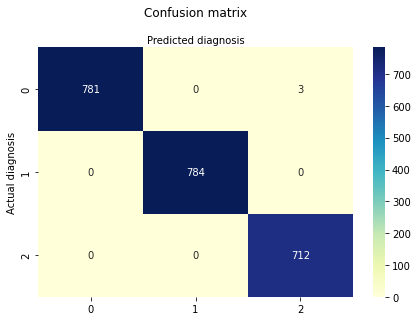

In [79]:
# After this point everything is extra
cnf_matrix = confusion_matrix(y_test, y_pred)

# Visualizing the Confusion Matrix
class_names = [1,2,3] 

fig, ax = plt.subplots()

tick_marks = np.arange(len(class_names)) 
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g') # Creating heatmap
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y = 1.1)
plt.ylabel('Actual diagnosis')
plt.xlabel('Predicted diagnosis')

In [84]:
# Prints Actual Values vs Predicted
for idx in range(len(y_pred)):
    actual = y_test[idx]
    predicted = y_pred[idx]

    if actual != predicted:
        print(f"{actual}\t{predicted} ERROR!")
        continue

    print(f"{actual}\t{predicted}")

2	2
3	3
3	3
1	1
2	2
1	1
3	3
2	2
2	2
2	2
3	3
1	1
2	2
1	1
3	3
1	1
3	3
1	1
3	3
3	3
1	1
3	3
1	1
2	2
1	1
1	1
2	2
1	1
3	3
3	3
1	1
2	2
2	2
1	1
3	3
3	3
1	1
2	2
1	1
2	2
1	1
3	3
3	3
1	1
3	3
3	3
3	3
1	1
3	3
2	2
1	1
3	3
3	3
2	2
3	3
1	1
2	2
3	3
1	1
3	3
2	2
2	2
3	3
2	2
3	3
3	3
2	2
3	3
1	1
2	2
1	1
3	3
2	2
2	2
3	3
2	2
2	2
1	1
1	1
3	3
2	2
2	2
2	2
1	1
2	2
3	3
3	3
2	2
1	1
3	3
1	1
2	2
2	2
2	2
2	2
2	2
2	2
1	1
2	2
1	1
1	1
1	1
1	1
3	3
2	2
2	2
3	3
1	1
2	2
1	1
3	3
2	2
3	3
1	1
1	1
2	2
2	2
1	1
2	2
2	2
1	1
2	2
2	2
1	1
1	1
2	2
1	1
3	3
2	2
1	1
1	1
2	2
1	1
2	2
1	1
3	3
1	1
2	2
3	3
3	3
1	1
3	3
1	1
3	3
3	3
3	3
1	1
3	3
1	1
2	2
3	3
1	1
3	3
1	1
3	3
2	2
2	2
1	1
3	3
3	3
3	3
1	1
1	1
3	3
2	2
2	2
2	2
2	2
2	2
2	2
3	3
2	2
1	1
1	1
1	1
2	2
3	3
1	1
1	1
3	3
1	1
2	2
3	3
2	2
1	1
2	2
1	1
3	3
2	2
2	2
2	2
1	1
1	1
2	2
2	2
3	3
2	2
1	1
2	2
1	1
1	1
2	2
2	2
1	1
1	1
1	1
1	1
3	3
3	3
1	1
3	3
2	2
2	2
1	1
2	2
2	2
3	3
2	2
1	1
2	2
1	1
1	1
1	1
3	3
3	3
1	1
1	1
1	1
2	2
1	1
3	3
3	3
1	1
2	2
3	3
1	1
3	3
2	2
2	2
3	3
1	1
2	2
1	1
2	2
1	1
3	3
2	2
1	1
1	1
2	2


[Text(0.5, 1.0, 'Testing-data Actual Values')]

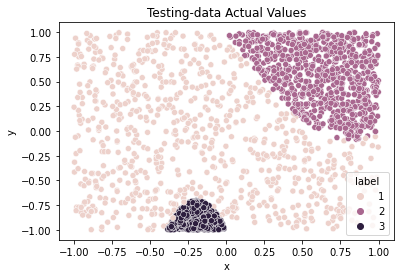

In [69]:
# Graphing the Data
#x, y = list(zip(*list(map(lambda x: list(x), list(X_test)))))
df = pd.read_csv('testing.csv')

sns.scatterplot(x='x', y='y', data=df, hue='label').set(title="Testing-data Actual Values")


[Text(0.5, 1.0, 'Testing-data Predicted Values')]

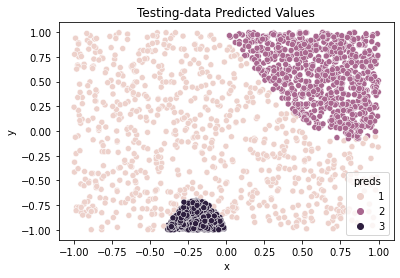

In [70]:
pred_df = pd.DataFrame(X_test)
pred_df['preds'] = y_pred
pred_df.rename(columns={0:'x',1:'y'}, inplace= True)

sns.scatterplot(x='x', y='y', data=pred_df, hue='preds').set(title="Testing-data Predicted Values")

In [ ]:
# MLP Classifeier (not as accurate as knn)
mlp_model = MLPClassifier(alpha=0.0007, max_iter=3000)
mlp_model.fit(X_train, y_train)
y_pred = mlp_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)